In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#fourier optics as convolution
def optical_conv(a,b):
    fft1=np.fft.fftshift(np.fft.fft2(a))
    fft2=np.fft.fftshift(np.fft.fft2(b))
    output=np.fft.ifftshift(fft1*fft2)
    return np.fft.fftshift(np.fft.ifft2(output))

#send a b to an optical representive
def oneline_conv(x1,x2):
    N=len(x1)+len(x2)+1
    a_screen=np.zeros((N,N))
    b_screen=np.zeros((N,N))
    size=len(x1)
    size2=len(x2)
    for i in range(size):
        a_screen[i+N//2-size//2,i+N//2-size//2]=x1[i]
    for i in range(size2):
        b_screen[i+N//2-size//2,i+N//2-size//2]=x2[i]
    output=optical_conv(a_screen,b_screen)
    return np.abs(np.round(output.diagonal()))

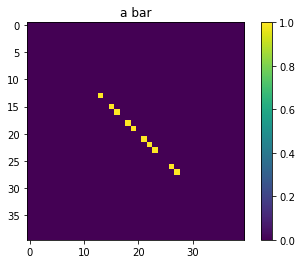

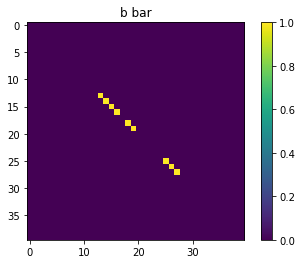

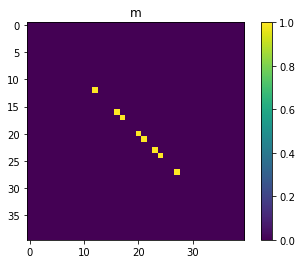

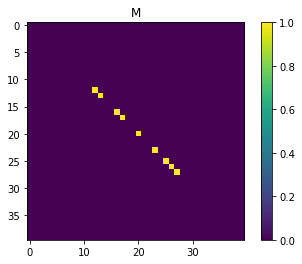

In [19]:
#initial value
a_=np.array([1,0,1,1,0,1,1,0,1,1,1,0,0,1,1]) #size=15
b_=np.array([1,1,1,1,0,1,1,0,0,0,0,0,1,1,1])
m=np.array([1,0,0,0,1,1,0,0,1,1,0,1,1,0,0,1])
MM=np.array([1,1,0,0,1,1,0,0,1,0,0,1,0,1,1,1])

sc=40
screen=np.zeros((sc,sc))
size=len(a_)
for i in range(size):
    screen[sc//2-size//2+i,sc//2-size//2+i]=a_[i]
plt.imshow(screen)
plt.title('a bar')
plt.colorbar()
plt.show()

screen=np.zeros((sc,sc))
size=len(b_)
for i in range(size):
    screen[sc//2-size//2+i,sc//2-size//2+i]=b_[i]
plt.imshow(screen)
plt.title('b bar')
plt.colorbar()
plt.show()

screen=np.zeros((sc,sc))
size=len(m)
for i in range(size):
    screen[sc//2-size//2+i,sc//2-size//2+i]=m[i]
plt.imshow(screen)
plt.title('m')
plt.colorbar()
plt.show()

screen=np.zeros((sc,sc))
size=len(MM)
for i in range(size):
    screen[sc//2-size//2+i,sc//2-size//2+i]=MM[i]
plt.imshow(screen)
plt.title('M')
plt.colorbar()
plt.show()

k1:[1. 1. 2. 3. 2. 4. 4. 3. 5. 4. 4. 5. 4. 4. 6. 6. 5. 3. 3. 4. 3. 2. 3. 2.
 1. 1. 2. 2. 1. 0. 0.],
k1_high:[1. 1. 2. 3. 2. 4. 4. 3. 5. 4. 4. 5. 4. 4. 6. 6. 5. 3. 3.],
k1_low:[4. 4. 6. 6. 5. 3. 3. 4. 3. 2. 3. 2. 1. 1. 2. 2. 1. 0. 0.]


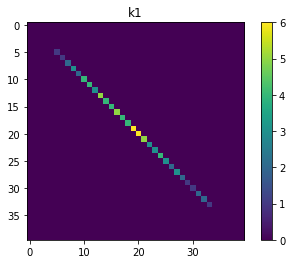

In [30]:
k1=oneline_conv(a_,b_)
k1_high=k1[:19]
k1_low=k1[12:]
print('k1:{0},\nk1_high:{1},\nk1_low:{2}'.format(k1,k1_high,k1_low))


screen=np.zeros((sc,sc))
size=len(k1)
for i in range(size):
    screen[sc//2-size//2+i,sc//2-size//2+i]=k1[i]
plt.imshow(screen)
plt.title('k1')
plt.colorbar()
plt.show()

[ 0.  0.  4.  8. 10. 12. 15. 16. 16. 19. 22. 17. 17. 22. 19. 20. 25. 32.
 28. 25. 24. 20. 16. 15. 13. 11.  9.  8.  6.  5.  5.  5.  3.  1.]


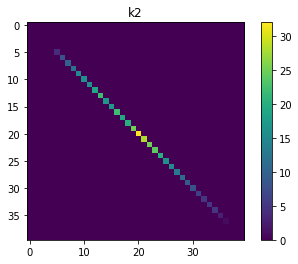

In [13]:
k2=oneline_conv(MM,k1_low)[:34]
print(k2)

screen=np.zeros((sc,sc))
size=len(k2)
for i in range(size):
    screen[sc//2-size//2+i,sc//2-size//2+i]=k2[i]
plt.imshow(screen)
plt.title('k2')
plt.colorbar()
plt.show()

[32. 28. 25. 24. 20. 16. 15. 13. 11.  9.  8.  6.  5.  5.  5.  3.  1.]


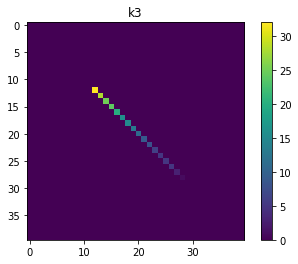

In [20]:
k3=k2[17:]
print(k3)

screen=np.zeros((sc,sc))
size=len(k3)
for i in range(size):
    screen[sc//2-size//2+i,sc//2-size//2+i]=k3[i]
plt.imshow(screen)
plt.title('k3')
plt.colorbar()
plt.show()

[ 32.  28.  25.  24.  52.  76.  68.  62.  87. 105.  92. 115. 133. 114.
 102. 121. 100.  86.  79.  66.  51.  43.  37.  30.  23.  19.  14.   9.
   6.   5.   3.   1.]


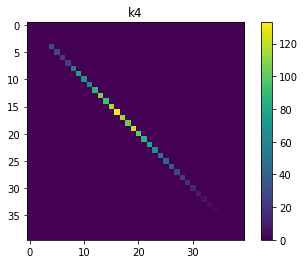

In [17]:
k4=oneline_conv(k3,m)[1:-1]
print(k4)

screen=np.zeros((sc,sc))
size=len(k4)
for i in range(size):
    screen[sc//2-size//2+i,sc//2-size//2+i]=k4[i]
plt.imshow(screen)
plt.title('k4')
plt.colorbar()
plt.show()

In [18]:
k4_high=k4[:22]
print(k4_high)



[ 32.  28.  25.  24.  52.  76.  68.  62.  87. 105.  92. 115. 133. 114.
 102. 121. 100.  86.  79.  66.  51.  43.]


In [31]:
k5_high=np.append(k4[:3],(k4_high[3:]+k1_high))
print(k5_high)


[ 32.  28.  25.  25.  53.  78.  71.  64.  91. 109.  95. 120. 137. 118.
 107. 125. 104.  92.  85.  71.  54.  46.]


In [33]:
c_bar=k5_high/2**7
c_bar

array([0.25     , 0.21875  , 0.1953125, 0.1953125, 0.4140625, 0.609375 ,
       0.5546875, 0.5      , 0.7109375, 0.8515625, 0.7421875, 0.9375   ,
       1.0703125, 0.921875 , 0.8359375, 0.9765625, 0.8125   , 0.71875  ,
       0.6640625, 0.5546875, 0.421875 , 0.359375 ])

In [41]:
summ=0
for i in range(len(c_bar)):
    summ+=c_bar[i]*2**(len(c_bar)-i-1)
print('C_bar:',np.round(summ))

C_bar: 1040632.0


In [83]:
len(c_bar)

22